**Research Paper** - https://www.ijcaonline.org/archives/volume178/number50/30895-2019919425

# Annotated heatmap

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

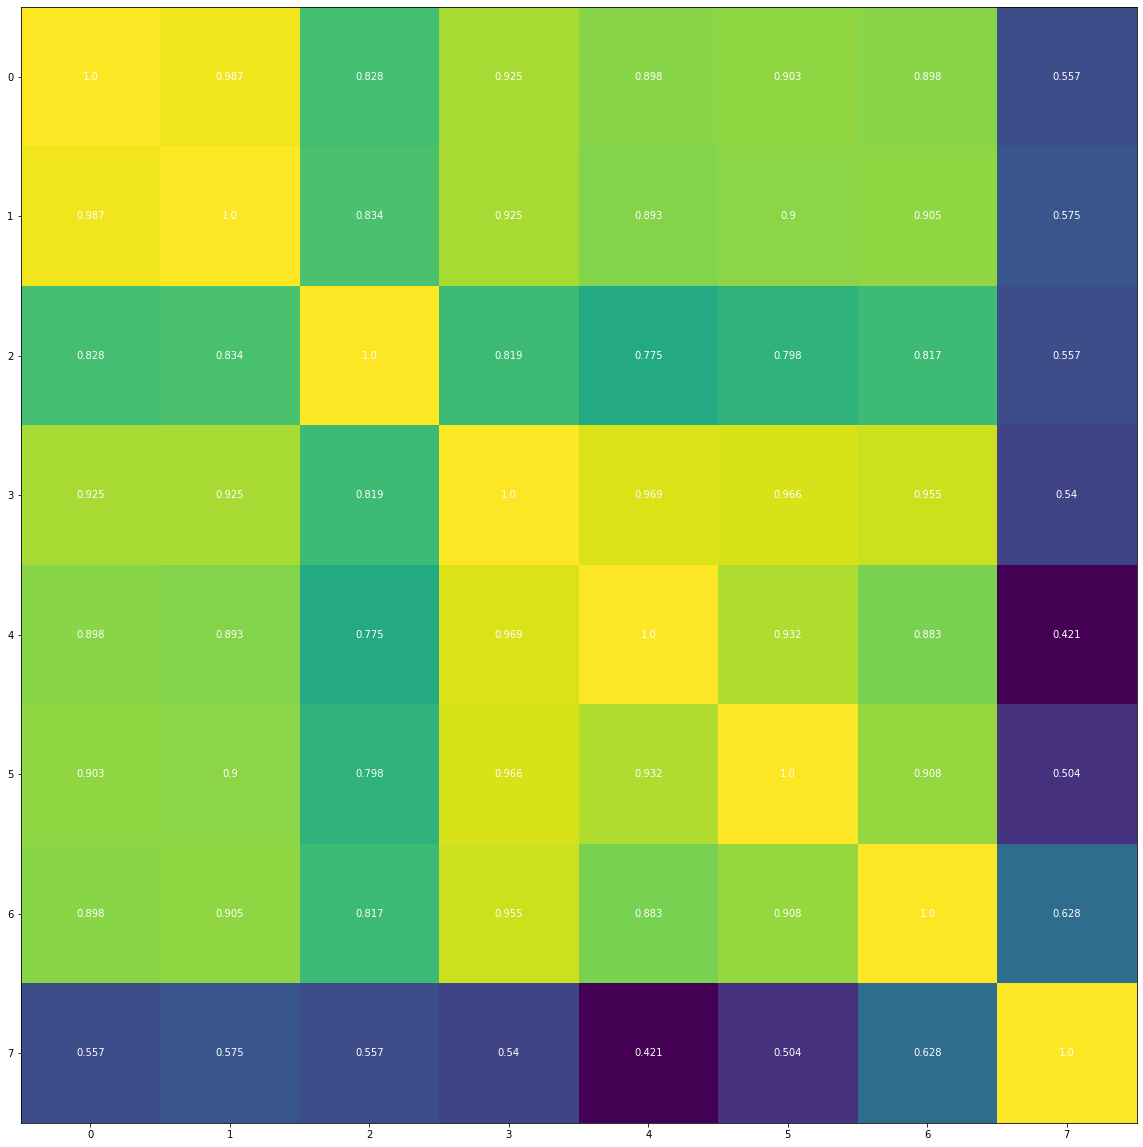

In [5]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline

target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                   'Viscera weight', 'Shell weight', 'Rings']

#calculate correlation matrix
corMat = DataFrame(abalone.iloc[:,1:9].corr()).values
corMat = np.around(corMat, decimals = 3)

#print correlation matrix
print(DataFrame(abalone.iloc[:,1:9].corr()))


#WITH ANNOTATION
fig, ax = plot.subplots(figsize = (20,60))
im = ax.imshow(corMat)

for i in range(8):
    for j in range(8):
        text = ax.text(j, i, corMat[i, j],
                       ha="center", va="center", color="w")


#visualize correlations using heatmap
#plot.pcolor(corMat)
#plot.show()


# RINGS distribution histogram

[  1.   1.  15.  57. 115. 259. 391. 568. 689. 634. 487. 267. 203. 126.
 103.  67.  58.  42.  32.  26.  14.   6.   9.   2.   1.   1.   2.   0.
   1.]


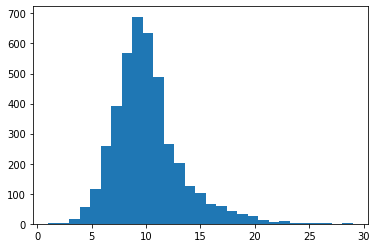

In [39]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

n, bins, patches = plot.hist(labels, bins = 29)

print(n)

# ABALONE OLS without SMOTE

Mean absolute error:1.5005085947175143


c:\users\kunj\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0, 'Actual Rings')

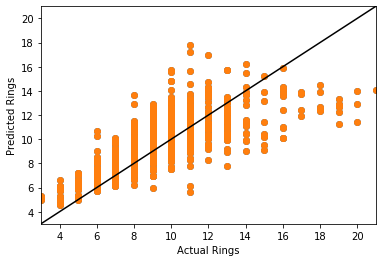

In [356]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xNormalizedTrain = xCoded[:-835]
xNormalizedTest  = xCoded[-835:]

labelNormalizedTrain = labels[:-835]
labelNormalizedTest  = labels[-835:]

regr = linear_model.LinearRegression()
regr.fit(xNormalizedTrain, labelNormalizedTrain);

prediction = regr.predict(xNormalizedTest)

print("Mean absolute error:" + str(mean_absolute_error(labelNormalizedTest, prediction)))
plot.scatter(labelNormalizedTest, prediction)

ax = plot.axes()
ax.scatter(labelNormalizedTest, prediction)
absmin = min([min(labelNormalizedTest),min(prediction)])
absmax = max([max(labelNormalizedTest),max(prediction)])
ax.axis([absmin, absmax, absmin, absmax])
ax.plot([absmin, absmax], [absmin, absmax],c="k")
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')

# ABALONE OLS with SMOTE 

Mean absolute error:1.89927111959167


Text(0.5, 0, 'Actual Rings')

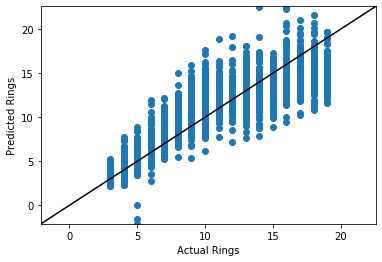

In [359]:
# import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import SMOTE
from collections import Counter

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

sm = SMOTE(k_neighbors=10, sampling_strategy = {3: 600, 4: 600, 5.0: 600, 6.0: 600, 7.0: 600, 8.0: 600,
                                                11.0: 600, 12.0: 600, 13.0: 600, 14.0: 600, 15.0: 600, 
                                                16.0: 600, 17.0: 600, 18.0: 600, 19.0: 600})
resampledX, resampledY = sm.fit_resample(xCoded, labels)
#print('Resampled dataset shape %s' % Counter(resampledY))

# print(len(resampledX))
# print(len(resampledY))

newX = []
newY = []
for i in range(len(resampledY)):
    if resampledY[i] >= 3 and resampledY[i] <= 19:
        newX.append(resampledX[i])
        newY.append(resampledY[i])
        
labelNormalizedTest = []
labelNormalizedTrain = []
xNormalizedTest = []
xNormalizedTrain = []

occurences = [0] * 21
    
for i in range(len(newY)):
    try:
        if(occurences[int(str(newY[i]).split(".")[0])] <= 480):
            labelNormalizedTrain.append(newY[i])
            xNormalizedTrain.append(newX[i])
            occurences[int(str(newY[i]).split(".")[0])] += 1
        else:
            labelNormalizedTest.append(newY[i])
            xNormalizedTest.append(newX[i])
    except:
        print(str(resampledY[i]) + " index:" + str(i))
        
regr = linear_model.LinearRegression()
regr.fit(xNormalizedTrain, labelNormalizedTrain);

prediction = regr.predict(xNormalizedTest)

print("Mean absolute error:" + str(mean_absolute_error(labelNormalizedTest, prediction)))

ax = plot.axes()
ax.scatter(labelNormalizedTest, prediction)
absmin = min([min(labelNormalizedTest),min(prediction)])
absmax = max([max(labelNormalizedTest),max(prediction)])
ax.axis([absmin, absmax, absmin, absmax])
ax.plot([absmin, absmax], [absmin, absmax],c="k")
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')

# RANSAC

Mean absolute error:1.3435366867102876


Text(0.5, 0, 'Actual Rings')

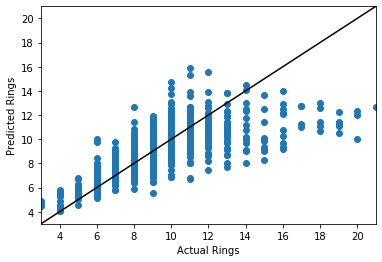

In [403]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xNormalizedTrain = xCoded[:-835]
xNormalizedTest  = xCoded[-835:]

labelNormalizedTrain = labels[:-835]
labelNormalizedTest  = labels[-835:]

regr = linear_model.RANSACRegressor(loss = "absolute_loss", min_samples = 30)
regr.fit(xNormalizedTrain, labelNormalizedTrain);
inlier_mask = regr.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

prediction = regr.predict(xNormalizedTest)

print("Mean absolute error:" + str(mean_absolute_error(labelNormalizedTest, prediction)))

ax = plot.axes()
ax.scatter(labelNormalizedTest, prediction)
absmin = min([min(labelNormalizedTest),min(prediction)])
absmax = max([max(labelNormalizedTest),max(prediction)])
ax.axis([absmin, absmax, absmin, absmax])
ax.plot([absmin, absmax], [absmin, absmax],c="k")
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')

# RANSAC with SMOTE

Mean absolute error:1.83064737722188


Text(0.5, 0, 'Actual Rings')

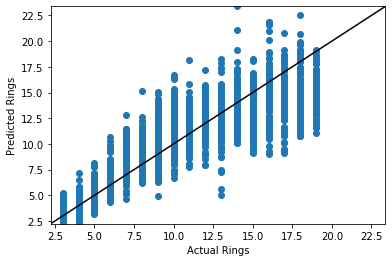

In [364]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import SMOTE
from collections import Counter

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

sm = SMOTE(k_neighbors=10, sampling_strategy = {3: 600, 4: 600, 5.0: 600, 6.0: 600, 7.0: 600, 8.0: 600,
                                                11.0: 600, 12.0: 600, 13.0: 600, 14.0: 600, 15.0: 600, 
                                                16.0: 600, 17.0: 600, 18.0: 600, 19.0: 600})
resampledX, resampledY = sm.fit_resample(xCoded, labels)
#print('Resampled dataset shape %s' % Counter(resampledY))

# print(len(resampledX))
# print(len(resampledY))

newX = []
newY = []
for i in range(len(resampledY)):
    if resampledY[i] >= 3 and resampledY[i] <= 19:
        newX.append(resampledX[i])
        newY.append(resampledY[i])

labelNormalizedTest = []
labelNormalizedTrain = []
xNormalizedTest = []
xNormalizedTrain = []

occurences = [0] * 21
    
for i in range(len(newY)):
    try:
        if(occurences[int(str(newY[i]).split(".")[0])] <= 480):
            labelNormalizedTrain.append(newY[i])
            xNormalizedTrain.append(newX[i])
            occurences[int(str(newY[i]).split(".")[0])] += 1
        else:
            labelNormalizedTest.append(newY[i])
            xNormalizedTest.append(newX[i])
    except:
        print(str(resampledY[i]) + " index:" + str(i))

regr = linear_model.RANSACRegressor(loss = "absolute_loss", min_samples = 20)
regr.fit(xNormalizedTrain, labelNormalizedTrain);
inlier_mask = regr.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

prediction = regr.predict(xNormalizedTest)

print("Mean absolute error:" + str(mean_absolute_error(labelNormalizedTest, prediction)))

ax = plot.axes()
ax.scatter(labelNormalizedTest, prediction)
absmin = min([min(labelNormalizedTest),min(prediction)])
absmax = max([max(labelNormalizedTest),max(prediction)])
ax.axis([absmin, absmax, absmin, absmax])
ax.plot([absmin, absmax], [absmin, absmax],c="k")
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')

# Ridge without SMOTE

Mean absolute error:1.499688654661181


Text(0.5, 0, 'Actual Rings')

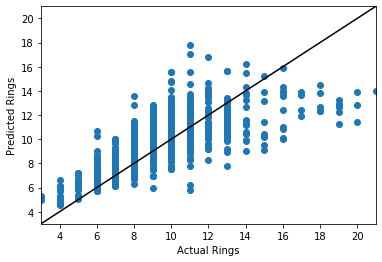

In [440]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xNormalizedTrain = xCoded[:-835]
xNormalizedTest  = xCoded[-835:]

labelNormalizedTrain = labels[:-835]
labelNormalizedTest  = labels[-835:]

regr = linear_model.Ridge(max_iter = 500, alpha = 0.1)
regr.fit(xNormalizedTrain, labelNormalizedTrain);

prediction = regr.predict(xNormalizedTest)

print("Mean absolute error:" + str(mean_absolute_error(labelNormalizedTest, prediction)))

ax = plot.axes()
ax.scatter(labelNormalizedTest, prediction)
absmin = min([min(labelNormalizedTest),min(prediction)])
absmax = max([max(labelNormalizedTest),max(prediction)])
ax.axis([absmin, absmax, absmin, absmax])
ax.plot([absmin, absmax], [absmin, absmax],c="k")
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')

# RIDGE w SMOTE

Mean absolute error:1.926647110837473


Text(0.5, 0, 'Actual Rings')

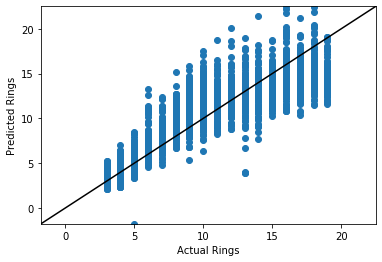

In [457]:
# import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import SMOTE
from collections import Counter

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

sm = SMOTE(k_neighbors=10, sampling_strategy = {3: 600, 4: 600, 5.0: 600, 6.0: 600, 7.0: 600, 8.0: 600,
                                                11.0: 600, 12.0: 600, 13.0: 600, 14.0: 600, 15.0: 600, 
                                                16.0: 600, 17.0: 600, 18.0: 600, 19.0: 600})
resampledX, resampledY = sm.fit_resample(xCoded, labels)
#print('Resampled dataset shape %s' % Counter(resampledY))

# print(len(resampledX))
# print(len(resampledY))

newX = []
newY = []
for i in range(len(resampledY)):
    if resampledY[i] >= 3 and resampledY[i] <= 19:
        newX.append(resampledX[i])
        newY.append(resampledY[i])

labelNormalizedTest = []
labelNormalizedTrain = []
xNormalizedTest = []
xNormalizedTrain = []

occurences = [0] * 21
    
for i in range(len(newY)):
    try:
        if(occurences[int(str(newY[i]).split(".")[0])] <= 480):
            labelNormalizedTrain.append(newY[i])
            xNormalizedTrain.append(newX[i])
            occurences[int(str(newY[i]).split(".")[0])] += 1
        else:
            labelNormalizedTest.append(newY[i])
            xNormalizedTest.append(newX[i])
    except:
        print(str(resampledY[i]) + " index:" + str(i))

regr = linear_model.Ridge(alpha = 0.01)
regr.fit(xNormalizedTrain, labelNormalizedTrain);

prediction = regr.predict(xNormalizedTest)

print("Mean absolute error:" + str(mean_absolute_error(labelNormalizedTest, prediction)))

ax = plot.axes()
ax.scatter(labelNormalizedTest, prediction)
absmin = min([min(labelNormalizedTest),min(prediction)])
absmax = max([max(labelNormalizedTest),max(prediction)])
ax.axis([absmin, absmax, absmin, absmax])
ax.plot([absmin, absmax], [absmin, absmax],c="k")
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')

# Ridge CV

4177
1.8679224827568293
2.4288001746575896
1.345973478423138
1.2778662559425618
1.3788676742034063
2.0769286262483826
1.2168885469951936
1.7146720988189696
1.432309545346517
1.5343652643753052
1.6274594147767893


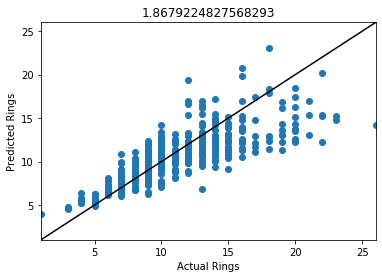

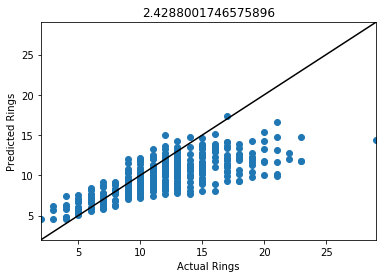

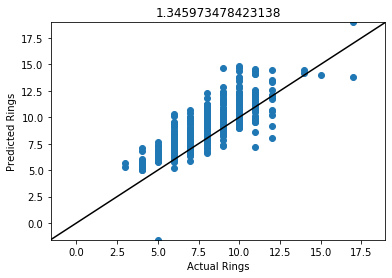

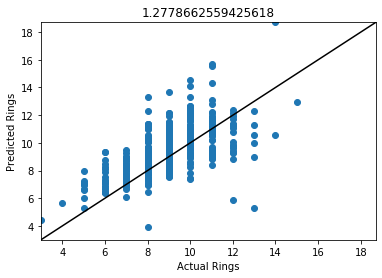

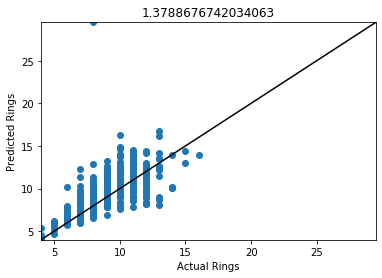

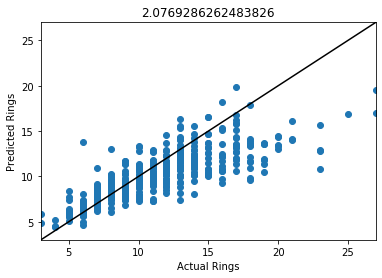

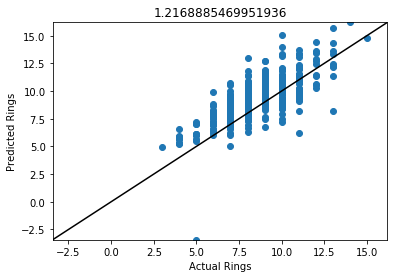

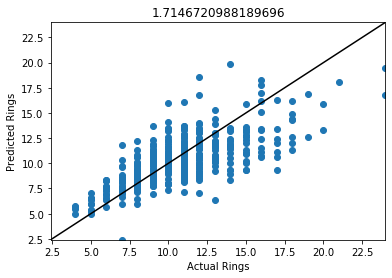

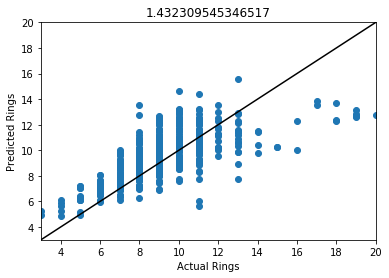

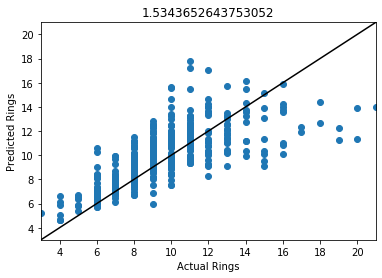

<Figure size 432x288 with 0 Axes>

In [73]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")
    
    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

print(len(xList))
#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xCoded = np.array(xCoded)
labels = np.array(labels)

kf = KFold(n_splits = 10)
kf.get_n_splits(xCoded)
mae = []

for train_index, test_index in kf.split(xCoded):
    # print("TRAIN:", train_index, "TEST:", test_index)
    xNormalizedTrain, xNormalizedTest = xCoded[train_index], xCoded[test_index]
    labelNormalizedTrain, labelNormalizedTest = labels[train_index], labels[test_index]

    regr = linear_model.Ridge(alpha = 0.01)
    regr.fit(xNormalizedTrain, labelNormalizedTrain);
    
    prediction = regr.predict(xNormalizedTest)
    print(mean_absolute_error(labelNormalizedTest, prediction))
    mae.append(mean_absolute_error(labelNormalizedTest, prediction))
    
    ax = plot.axes()
    plot.figure()
    ax.scatter(labelNormalizedTest, prediction)
    absmin = min([min(labelNormalizedTest),min(prediction)])
    absmax = max([max(labelNormalizedTest),max(prediction)])
    ax.axis([absmin, absmax, absmin, absmax])
    ax.plot([absmin, absmax], [absmin, absmax],c="k")
    ax.set_ylabel('Predicted Rings') 
    ax.set_xlabel('Actual Rings')
    ax.set_title(mean_absolute_error(labelNormalizedTest, prediction))
    
print(sum(mae)/len(mae))

# Huber Regressor

Mean absolute error:1.3990476915975334


Text(0.5, 0, 'Actual Rings')

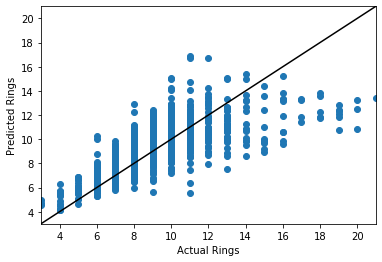

In [487]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xNormalizedTrain = xCoded[:-835]
xNormalizedTest  = xCoded[-835:]

labelNormalizedTrain = labels[:-835]
labelNormalizedTest  = labels[-835:]

regr = linear_model.HuberRegressor(epsilon = 1)
regr.fit(xNormalizedTrain, labelNormalizedTrain);

prediction = regr.predict(xNormalizedTest)

print("Mean absolute error:" + str(mean_absolute_error(labelNormalizedTest, prediction)))

ax = plot.axes()
ax.scatter(labelNormalizedTest, prediction)
absmin = min([min(labelNormalizedTest),min(prediction)])
absmax = max([max(labelNormalizedTest),max(prediction)])
ax.axis([absmin, absmax, absmin, absmax])
ax.plot([absmin, absmax], [absmin, absmax],c="k")
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')

# Huber CV

4177
1.9487628847053433
2.7141743158112015
1.1587759856456175
1.1310777544633048
1.2288609489876876
2.3059456646862553
1.0496831026724167
1.7440270803505982
1.3279900655016104
1.4410210290073047
1.605031883183134


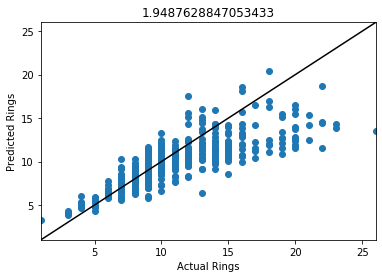

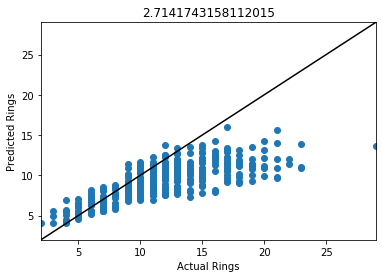

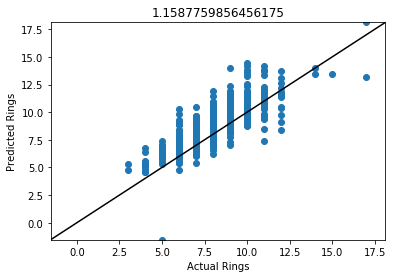

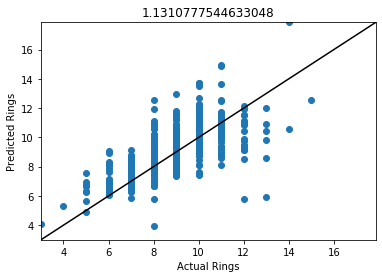

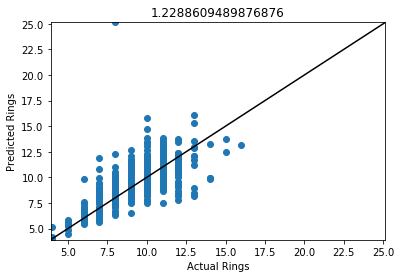

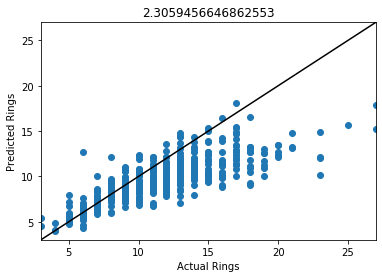

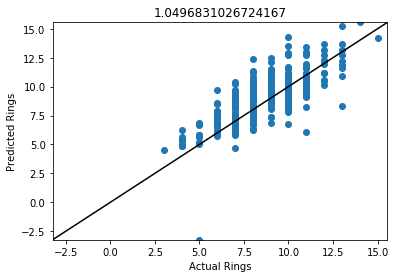

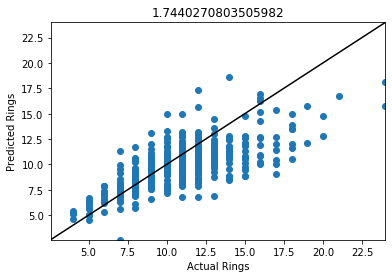

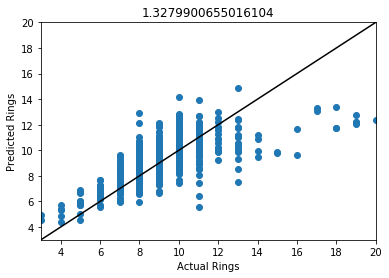

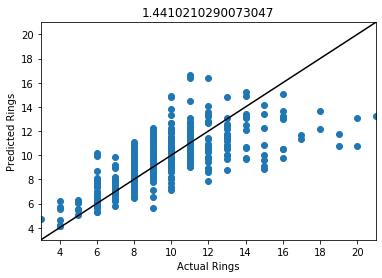

<Figure size 432x288 with 0 Axes>

In [69]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")
    
    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

print(len(xList))
#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xCoded = np.array(xCoded)
labels = np.array(labels)

kf = KFold(n_splits = 10)
kf.get_n_splits(xCoded)
mae = []

for train_index, test_index in kf.split(xCoded):
    # print("TRAIN:", train_index, "TEST:", test_index)
    xNormalizedTrain, xNormalizedTest = xCoded[train_index], xCoded[test_index]
    labelNormalizedTrain, labelNormalizedTest = labels[train_index], labels[test_index]

    regr = linear_model.HuberRegressor(epsilon = 1)
    regr.fit(xNormalizedTrain, labelNormalizedTrain);

    prediction = regr.predict(xNormalizedTest)
    print(mean_absolute_error(labelNormalizedTest, prediction))
    mae.append(mean_absolute_error(labelNormalizedTest, prediction))
    
    ax = plot.axes()
    plot.figure()
    ax.scatter(labelNormalizedTest, prediction)
    absmin = min([min(labelNormalizedTest),min(prediction)])
    absmax = max([max(labelNormalizedTest),max(prediction)])
    ax.axis([absmin, absmax, absmin, absmax])
    ax.plot([absmin, absmax], [absmin, absmax],c="k")
    ax.set_ylabel('Predicted Rings') 
    ax.set_xlabel('Actual Rings')
    ax.set_title(mean_absolute_error(labelNormalizedTest, prediction))
    
print(sum(mae)/len(mae))

# Huber w SMOTE

Mean absolute error:1.8852883394762558


Text(0.5, 0, 'Actual Rings')

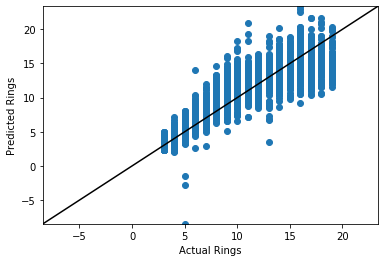

In [501]:
# import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import SMOTE
from collections import Counter

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

sm = SMOTE(k_neighbors=10, sampling_strategy = {3: 600, 4: 600, 5.0: 600, 6.0: 600, 7.0: 600, 8.0: 600,
                                                11.0: 600, 12.0: 600, 13.0: 600, 14.0: 600, 15.0: 600, 
                                                16.0: 600, 17.0: 600, 18.0: 600, 19.0: 600})
resampledX, resampledY = sm.fit_resample(xCoded, labels)
#print('Resampled dataset shape %s' % Counter(resampledY))

# print(len(resampledX))
# print(len(resampledY))

newX = []
newY = []
for i in range(len(resampledY)):
    if resampledY[i] >= 3 and resampledY[i] <= 19:
        newX.append(resampledX[i])
        newY.append(resampledY[i])

labelNormalizedTest = []
labelNormalizedTrain = []
xNormalizedTest = []
xNormalizedTrain = []

occurences = [0] * 21
    
for i in range(len(newY)):
    try:
        if(occurences[int(str(newY[i]).split(".")[0])] <= 480):
            labelNormalizedTrain.append(newY[i])
            xNormalizedTrain.append(newX[i])
            occurences[int(str(newY[i]).split(".")[0])] += 1
        else:
            labelNormalizedTest.append(newY[i])
            xNormalizedTest.append(newX[i])
    except:
        print(str(resampledY[i]) + " index:" + str(i))

regr = linear_model.HuberRegressor()
regr.fit(xNormalizedTrain, labelNormalizedTrain);

prediction = regr.predict(xNormalizedTest)

print("Mean absolute error:" + str(mean_absolute_error(labelNormalizedTest, prediction)))

ax = plot.axes()
ax.scatter(labelNormalizedTest, prediction)
absmin = min([min(labelNormalizedTest),min(prediction)])
absmax = max([max(labelNormalizedTest),max(prediction)])
ax.axis([absmin, absmax, absmin, absmax])
ax.plot([absmin, absmax], [absmin, absmax],c="k")
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')

# Ransac normalized without SMOTE

Mean absolute error:1.3383459215940743


Text(0.5, 0, 'Actual Rings')

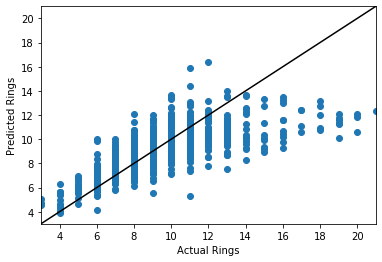

In [8]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xMeans = []
xSD = []
for i in range(ncols):
    col = [xCoded[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xCoded[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xCoded
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xCoded[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
# meanLabel = sum(labels)/nrows
# sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)

# labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

xNormalizedTrain = xNormalized[:-835]
xNormalizedTest  = xNormalized[-835:]

labelNormalizedTrain = labels[:-835]
labelNormalizedTest  = labels[-835:]

regr = linear_model.RANSACRegressor(loss = "absolute_loss", min_samples = 30)
regr.fit(xNormalizedTrain, labelNormalizedTrain);
inlier_mask = regr.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

prediction = regr.predict(xNormalizedTest)

for i in range 

print("Mean absolute error:" + str(mean_absolute_error(labelNormalizedTest, prediction)))

ax = plot.axes()
ax.scatter(labelNormalizedTest, prediction)
absmin = min([min(labelNormalizedTest),min(prediction)])
absmax = max([max(labelNormalizedTest),max(prediction)])
ax.axis([absmin, absmax, absmin, absmax])
ax.plot([absmin, absmax], [absmin, absmax],c="k")
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')

# RANSAC CV

4177
2.013327996417298
3.184231595103638
1.1346418718403477
1.147564918802934
1.220359402446596
2.2678458539975748
0.9494490146678819
1.80911355683795
1.3343303138933318
1.4456853052814311
1.6506549829288981


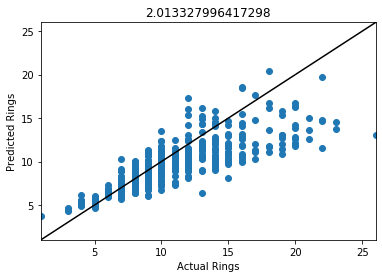

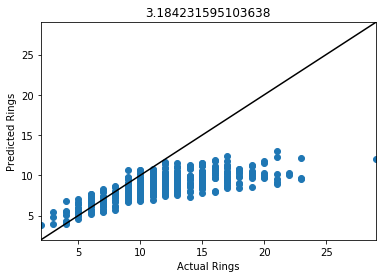

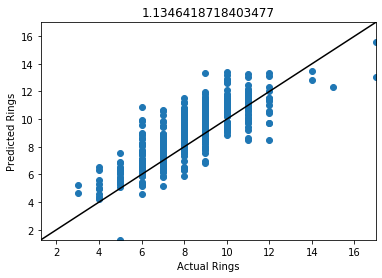

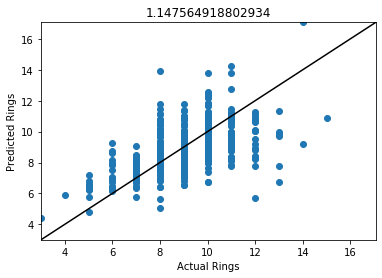

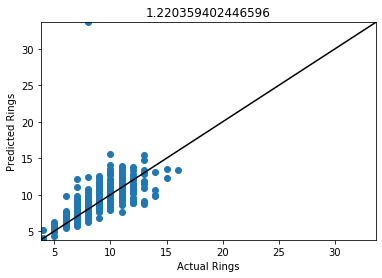

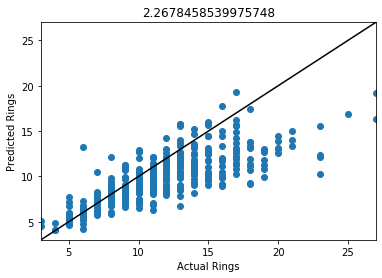

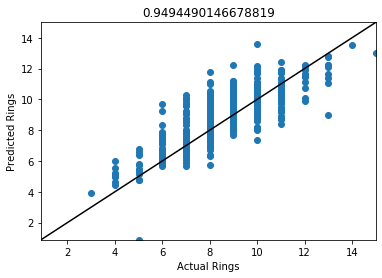

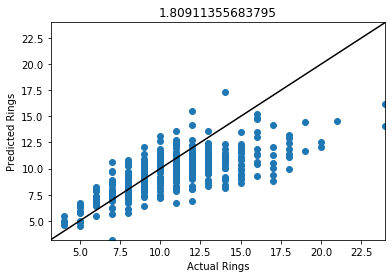

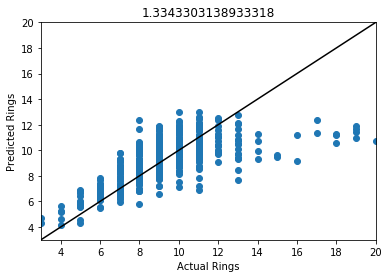

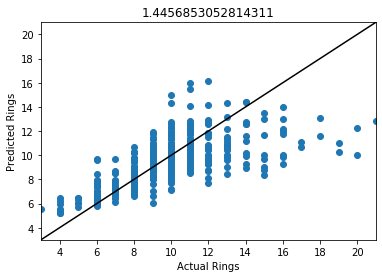

<Figure size 432x288 with 0 Axes>

In [64]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")
    
    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

print(len(xList))
#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xCoded = np.array(xCoded)
labels = np.array(labels)

kf = KFold(n_splits = 10)
kf.get_n_splits(xCoded)
mae = []

for train_index, test_index in kf.split(xCoded):
    # print("TRAIN:", train_index, "TEST:", test_index)
    xNormalizedTrain, xNormalizedTest = xCoded[train_index], xCoded[test_index]
    labelNormalizedTrain, labelNormalizedTest = labels[train_index], labels[test_index]

    regr = linear_model.RANSACRegressor(loss = "absolute_loss", min_samples = 30)
    regr.fit(xNormalizedTrain, labelNormalizedTrain);
    inlier_mask = regr.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    
    prediction = regr.predict(xNormalizedTest)
    print(mean_absolute_error(labelNormalizedTest, prediction))
    mae.append(mean_absolute_error(labelNormalizedTest, prediction))
    
    ax = plot.axes()
    plot.figure()
    ax.scatter(labelNormalizedTest, prediction)
    absmin = min([min(labelNormalizedTest),min(prediction)])
    absmax = max([max(labelNormalizedTest),max(prediction)])
    ax.axis([absmin, absmax, absmin, absmax])
    ax.plot([absmin, absmax], [absmin, absmax],c="k")
    ax.set_ylabel('Predicted Rings') 
    ax.set_xlabel('Actual Rings')
    ax.set_title(mean_absolute_error(labelNormalizedTest, prediction))
    
print(sum(mae)/len(mae))

# OLS CV

1.9905988068532579
2.991434667916397
1.0117028861134596
1.1550759507588622
1.2421331211663984
2.687656062898655
0.9362018838567587
1.781892502813024
1.287279876417567
1.449173778452157
1.6533149537246536


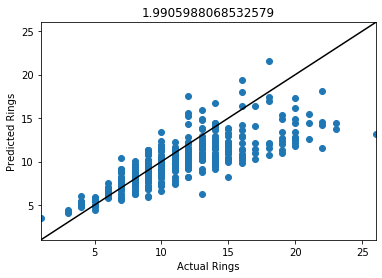

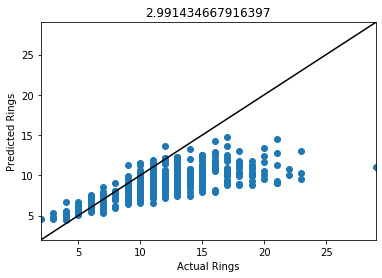

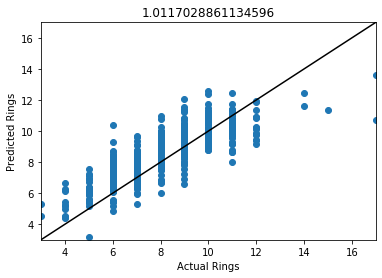

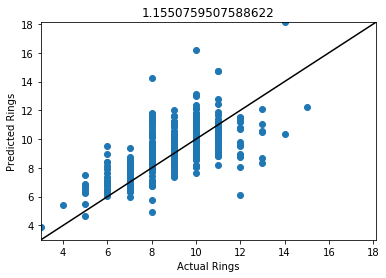

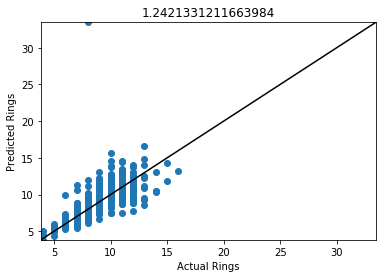

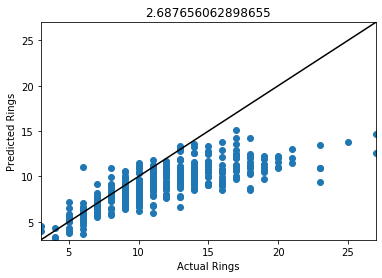

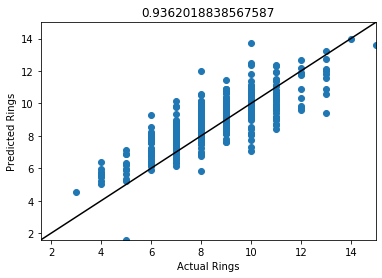

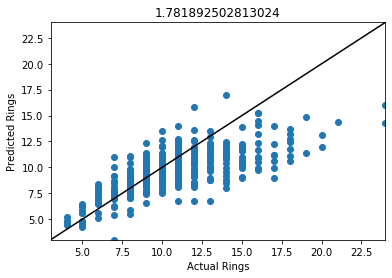

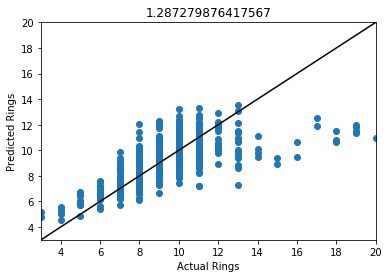

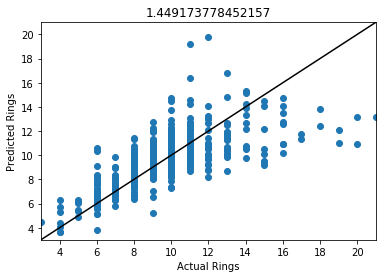

<Figure size 432x288 with 0 Axes>

In [63]:
import urllib.request, urllib.error, urllib.parse
from pylab import *
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#read abalone data
data = urllib.request.urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.decode().strip().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xCoded = np.array(xCoded)
labels = np.array(labels)

kf = KFold(n_splits = 10)
kf.get_n_splits(xCoded)
mae = []

for train_index, test_index in kf.split(xCoded):
    # print("TRAIN:", train_index, "TEST:", test_index)
    xNormalizedTrain, xNormalizedTest = xCoded[train_index], xCoded[test_index]
    labelNormalizedTrain, labelNormalizedTest = labels[train_index], labels[test_index]

    regr = linear_model.RANSACRegressor(loss = "absolute_loss", min_samples = 30)
    regr.fit(xNormalizedTrain, labelNormalizedTrain);
    inlier_mask = regr.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    
    prediction = regr.predict(xNormalizedTest)
    print(mean_absolute_error(labelNormalizedTest, prediction))
    mae.append(mean_absolute_error(labelNormalizedTest, prediction))
    
    ax = plot.axes()
    plot.figure()
    ax.scatter(labelNormalizedTest, prediction)
    absmin = min([min(labelNormalizedTest),min(prediction)])
    absmax = max([max(labelNormalizedTest),max(prediction)])
    ax.axis([absmin, absmax, absmin, absmax])
    ax.plot([absmin, absmax], [absmin, absmax],c="k")
    ax.set_ylabel('Predicted Rings') 
    ax.set_xlabel('Actual Rings')
    ax.set_title(mean_absolute_error(labelNormalizedTest, prediction))
    
print(sum(mae)/len(mae))